In [55]:
import csv
import os
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as sts
import numpy as np
# %matplotlib notebook

In [56]:
csvdata = 'Food_Access_USDA.csv'
df = pd.read_csv(csvdata)
df.shape

(948, 46)

In [57]:
df.head(5)

,OBJECTID,GEOID10,NAME10,PLNG_REGION,LILATracts_1And10,LILATracts_halfAnd10,LILATracts_1And20,LILATracts_Vehicle,Urban,Rural,...,lapop1share,lalowi1,lalowi1share,lakids1,lakids1share,laseniors1,laseniors1share,lahunv1,lahunv1share,GlobalID
0,1,13045910103,9101.03,ARC 20,0,0,0,0,0,1,...,0.830444,832.244207,0.165786,1212.092423,0.812939,388.429152,0.868969,30.598599,0.017656,{5550A054-FDCE-4733-8B0C-A1947228CE5D}
1,2,13045910104,9101.04,ARC 20,0,0,0,0,1,0,...,0.908498,2714.580415,0.292740,2531.804935,0.935281,613.913957,0.769316,105.395259,0.033133,{C6FF347E-7A0E-49CC-95F8-6442CAB49326}
2,3,13045910502,9105.02,ARC 20,1,1,1,1,1,0,...,0.677910,1634.143695,0.559638,394.285953,0.595598,108.874610,0.513559,141.638535,0.141497,{59E4487C-A509-45FF-95E5-D3C0BBE650BB}
3,4,13045910800,9108.00,ARC 20,0,0,0,0,0,1,...,1.000000,1557.335152,0.391881,958.000006,1.000000,491.000002,1.000000,41.470898,0.028405,{B14B7E5F-B673-439E-9C6E-638AD0B38A33}
4,5,13045910101,9101.01,ARC 20,1,1,1,1,1,0,...,0.247035,738.495538,0.124557,400.600253,0.237182,153.517815,0.282722,61.471188,0.027176,{C3D7DA7F-5468-4F0E-A705-CA99B9E57806}


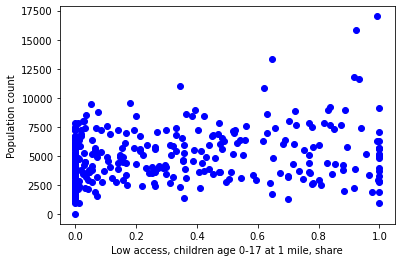

In [58]:
# Narrow down to urban areas
df.loc[(df["PLNG_REGION"] == 'ARC 10') & (df["Urban"] == 1)]
# Create three DF's to store different columns
kids_df = df[{"POP2010","PLNG_REGION","Urban","lakidshalf","lakidshalfshare","lakids1","lakids1share","lalowi1","lalowi1share","lapop1","lapop1share", "LowIncomeTracts"}]
# Narrow down to urban areas
kids_df_low=kids_df[(df["LowIncomeTracts"] == 1)]
kids_df_high=kids_df[(df["LowIncomeTracts"] == 0)]
# pull out population count 
x_low=kids_df_low["lakids1share"]
y_low=kids_df_low["POP2010"]

kidplt=plt.scatter(x_low,y_low, color="blue")
plt.xlabel("Low access, children age 0-17 at 1 mile, share")
plt.ylabel("Population count")
# plt.axis([0, 1.05, 0, 18000])
plt.show()

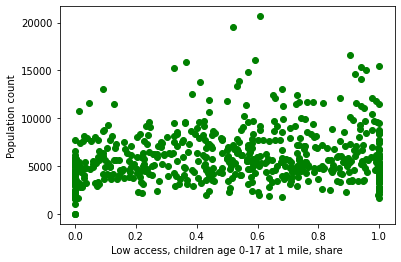

In [59]:
x=kids_df_high["lakids1share"]
y=kids_df_high["POP2010"]

kid2plt=plt.scatter(x,y, color="green")
plt.xlabel("Low access, children age 0-17 at 1 mile, share")
plt.ylabel("Population count")
# plt.axis([0, 1.05, 0, 18000])
plt.show()

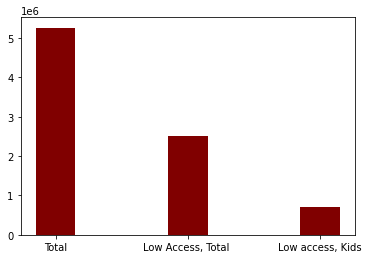

In [80]:
df_low=df[(df["LILATracts_1And10"] == 1)]
total_pop=df["POP2010"].sum()
total_popl=df["lapop1"].sum()
total_kids=df["lakids1"].sum()
x=["Total","Low Access, Total ","Low access, Kids"]
y=[total_pop,total_popl, total_kids]
plt.bar(x, y, color="maroon", width=0.3)
plt.show()


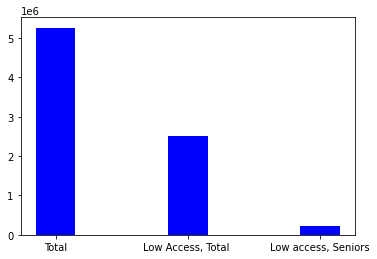

In [81]:
df_high=df[(df["LILATracts_1And10"] == 0)]
total_pop=df["POP2010"].sum()
total_popl=df["lapop1"].sum()
total_seniors=df["laseniors1"].sum()
x=["Total","Low Access, Total ","Low access, Seniors"]
y=[total_pop,total_popl, total_seniors]
plt.bar(x, y, color="blue", width=0.3)
plt.show()

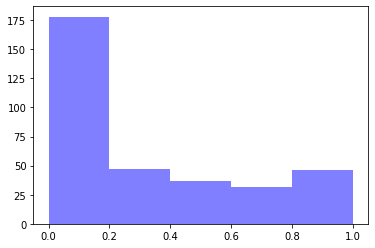

In [51]:
x=kids_df_low["lakids1share"]
num_bins = 5
n, bins, patches = plt.hist(x, num_bins, facecolor='blue', alpha=0.5)
plt.show()